In [1]:
# !pip install pandas
# !pip install matplotlib seaborn numpy 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/home/jovyan/work/Different_stores_dataset.csv')

In [5]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [6]:
df.isna().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [7]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')
df['date'] = pd.to_datetime(df['invoice_date'].dt.date,format='%Y-%m-%d')
df['weekday'] = df['invoice_date'].dt.weekday

In [8]:
df['selling_price'] = df['quantity'] * df['selling_price_per_unit']
df['profit_per_unit'] = df['selling_price_per_unit'] - df['cost_price_per_unit']
df['profit'] = df['profit_per_unit'] * df['quantity']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   cost_price_per_unit     99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

In [10]:
# Какой тренд продаж в рассматриваемом периоде? 

In [11]:
df_selling_price_by_day =(
df
    .groupby('date')
    .agg({'selling_price': 'sum'})
    .sort_values('date')
)

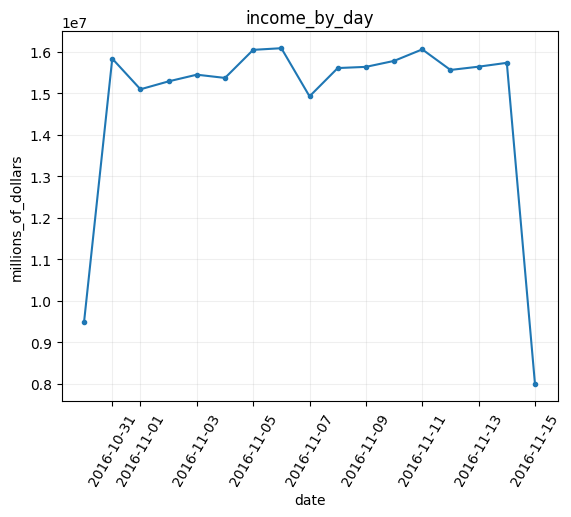

In [12]:
plt.plot(df_selling_price_by_day, marker='.')
plt.xticks(rotation=60)
plt.xlabel('date')
plt.ylabel('millions_of_dollars')
plt.title('income_by_day')
plt.grid(alpha=.2)
plt.show()

In [13]:
# Разбивка прибыли по категориям товаров 

In [14]:
df['category'].drop_duplicates()

0            Clothing
1               Shoes
4               Books
6           Cosmetics
10    Food & Beverage
12               Toys
23         Technology
67           Souvenir
Name: category, dtype: object

In [15]:
df_selling_price_by_category = (
df
    .groupby('category')
    .agg({'selling_price': 'sum'})
    .sort_values('selling_price')
)

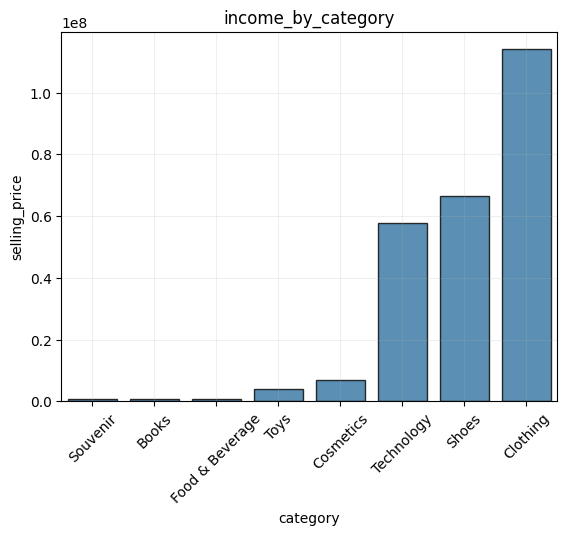

In [16]:
sns.barplot(data = df_selling_price_by_category, x='category', y='selling_price', edgecolor='black', alpha=.8)
plt.xticks(rotation=45)
plt.xlabel('category')
plt.title('income_by_category')
plt.grid(alpha=.2)
plt.show()

In [17]:
# Какие товары покупают чаще по дням недели 

In [18]:
day_mapping = {0: 'monday', 1: 'thuesday', 2: 'wendesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
df['weekday'] = df['weekday'].map(day_mapping)

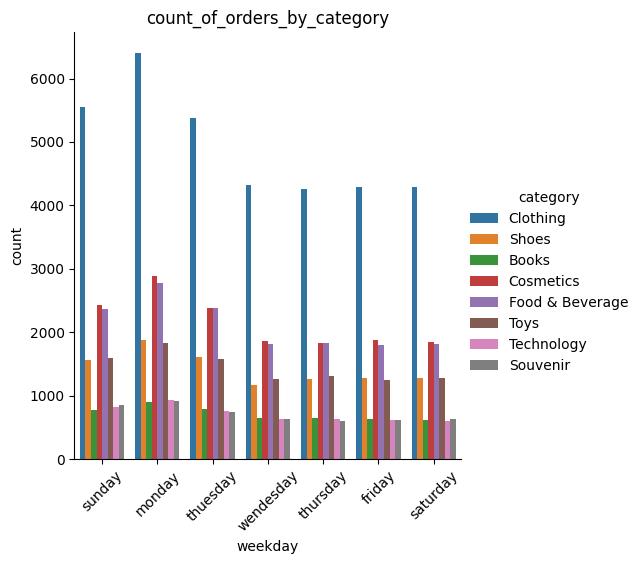

In [19]:
sns.catplot(kind='count', x='weekday', hue='category', data=df)
plt.title('count_of_orders_by_category')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,date,weekday,selling_price,profit_per_unit,profit
0,I138884,2016-10-30 09:58:00,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,2016-10-30,sunday,7502.00,75.020,375.100
1,I317333,2016-10-30 09:58:00,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,2016-10-30,sunday,5401.53,180.051,540.153
2,I127801,2016-10-30 09:58:00,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,2016-10-30,sunday,300.08,5.020,5.020
3,I173702,2016-10-30 09:58:00,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,2016-10-30,sunday,15004.25,100.085,500.425
4,I337046,2016-10-30 09:59:00,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,2016-10-30,sunday,242.40,15.150,60.600


In [21]:
# Разбивка прибыли по штатам

In [22]:
df_income_by_state = (
df
    .groupby('state')
    .agg({'selling_price': 'sum'})
    .sort_values('selling_price', ascending = False)
)

/tmp/ipykernel_25459/2693997570.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
/tmp/ipykernel_25459/2693997570.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


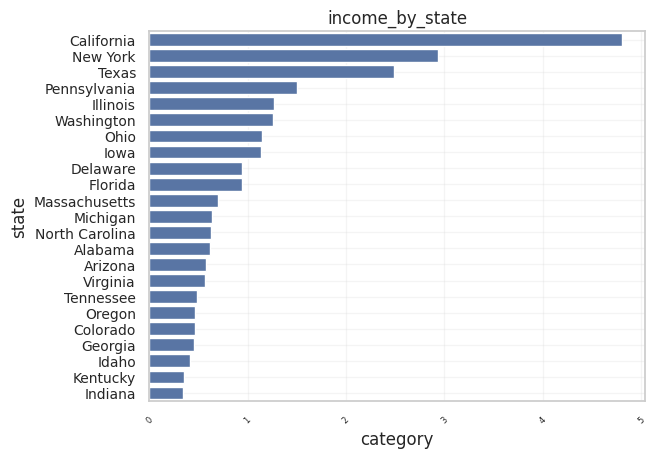

In [33]:
sns.set(style="whitegrid")
ax = sns.barplot(x='selling_price', y='state', data=df_income_by_state)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  
plt.xticks(rotation=45)
plt.xlabel('category')
plt.title('income_by_state')
plt.grid(alpha=.2)
plt.show()

In [24]:
# Какие ТЦ лидеры по кол-ву продаж по каждому штату 

In [25]:
sales_by_mall_state  = (
df
    .groupby(['shopping_mall', 'state'])
    .agg({'quantity': 'sum'})
    .reset_index()
)
print(sales_by_mall_state)

    shopping_mall         state  quantity
0    Istinye Park       Alabama      1217
1    Istinye Park       Arizona      1043
2    Istinye Park    California      8576
3    Istinye Park      Colorado       895
4    Istinye Park      Delaware      1768
..            ...           ...       ...
156  Zorlu Center  Pennsylvania      1818
157  Zorlu Center     Tennessee       614
158  Zorlu Center         Texas      2912
159  Zorlu Center      Virginia       699
160  Zorlu Center    Washington      1584

[161 rows x 3 columns]


In [26]:
top_malls_by_state = (
    sales_by_mall_state
        .loc[sales_by_mall_state
        .groupby('state')['quantity']
        .idxmax()]
        .sort_values('quantity', ascending = False)
)
print(top_malls_by_state)

       shopping_mall           state  quantity
25            Kanyon      California     11508
37            Kanyon        New York      6615
43            Kanyon           Texas      5899
41            Kanyon    Pennsylvania      3469
45            Kanyon      Washington      3118
54  Mall of Istanbul        Illinois      2947
39            Kanyon            Ohio      2672
56  Mall of Istanbul            Iowa      2665
51  Mall of Istanbul         Florida      2432
50  Mall of Istanbul        Delaware      2421
36            Kanyon        Michigan      1657
38            Kanyon  North Carolina      1545
35            Kanyon   Massachusetts      1521
23            Kanyon         Alabama      1451
44            Kanyon        Virginia      1371
47  Mall of Istanbul         Arizona      1364
65  Mall of Istanbul       Tennessee      1155
26            Kanyon        Colorado      1119
40            Kanyon          Oregon      1052
30            Kanyon           Idaho      1033
29           

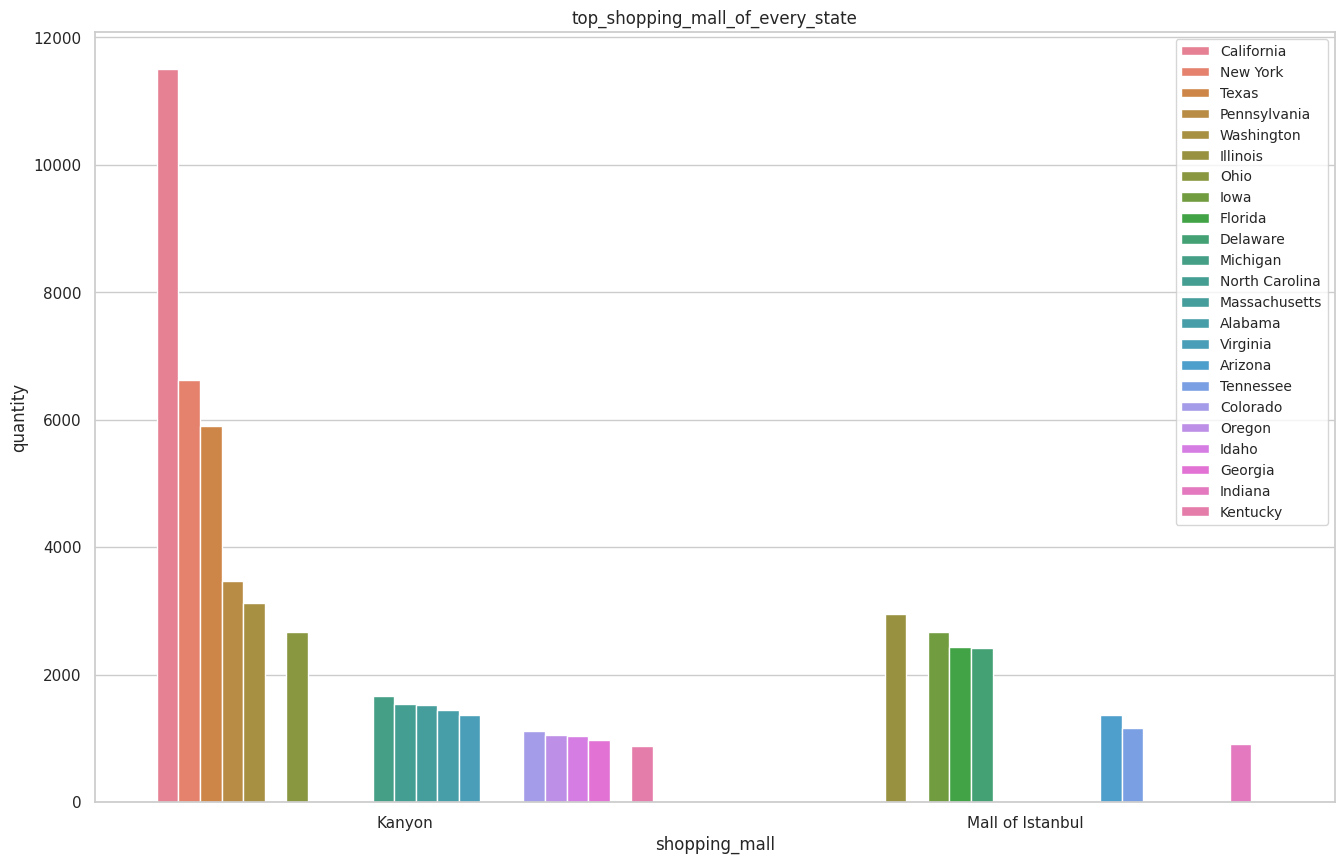

In [27]:
plt.figure(figsize=(16, 10))
sns.barplot(x='shopping_mall', y='quantity', hue='state', data=top_malls_by_state)
plt.title('top_shopping_mall_of_every_state')
plt.xlabel('shopping_mall')
plt.ylabel('quantity')
plt.legend(fontsize='small')
plt.show()

In [61]:
def app_tolist(data):
    rounded_val = []
    for i in data.values:
        rounded_val.append(round(i))
    return rounded_val

In [47]:
df_avg_profit_by_category = df.groupby('category')['profit'].mean().sort_values(ascending = False)

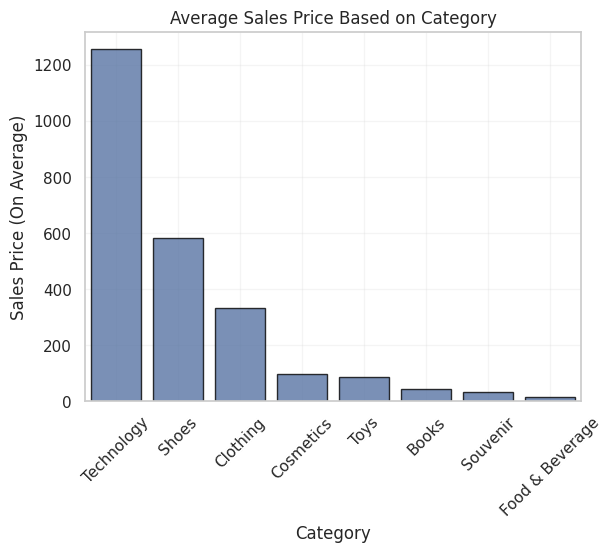

In [50]:
sns.barplot(x=df_avg_profit_by_category.index, y=app_tolist(df_avg_profit_by_category), edgecolor='black', alpha=.8)
plt.xticks(rotation=45)
plt.ylabel('Sales Price (On Average)')
plt.xlabel('Category')
plt.title('Average Sales Price Based on Category')
plt.grid(alpha=.2)
plt.show()